### Let's start with simple linear regression model, and for simplicity I will use temperature as my predictor feature. I expect that this model is not going to be any good as there is no strong correlation between both.

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

from datetime import datetime
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [146]:
bakery_temp = pd.read_pickle('Data/bakery_temp_dataframe.pkl')

In [147]:
bakery_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20506 entries, 0 to 20505
Data columns (total 18 columns):
Date           20506 non-null object
Time           20506 non-null object
Transaction    20506 non-null int64
Item           20506 non-null object
Date_Time      20506 non-null datetime64[ns]
Day_of_Week    20506 non-null object
Month          20506 non-null int64
Month_Order    20506 non-null int64
Season         20506 non-null object
Hour           20506 non-null int64
Session        20506 non-null object
Category       20506 non-null object
Hourly         20506 non-null datetime64[ns]
Monthly        20506 non-null object
Weekly         20506 non-null object
Unnamed: 0     20506 non-null float64
time           20506 non-null float64
temperature    20506 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(4), object(9)
memory usage: 3.0+ MB


In [148]:
bakery_temp.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
Date_Time      0
Day_of_Week    0
Month          0
Month_Order    0
Season         0
Hour           0
Session        0
Category       0
Hourly         0
Monthly        0
Weekly         0
Unnamed: 0     0
time           0
temperature    0
dtype: int64

In [149]:
df_columns = bakery_temp.columns
df_columns

Index(['Date', 'Time', 'Transaction', 'Item', 'Date_Time', 'Day_of_Week',
       'Month', 'Month_Order', 'Season', 'Hour', 'Session', 'Category',
       'Hourly', 'Monthly', 'Weekly', 'Unnamed: 0', 'time', 'temperature'],
      dtype='object')

In [150]:
#Extracts the dates
dates = pd.DatetimeIndex(bakery_temp['Date_Time'])

In [151]:
#Create new dataset with only item and date 
bakery = pd.DataFrame(bakery_temp.Item.values, columns=['Item'], index=dates)

In [152]:
bakery_test = pd.DataFrame(bakery_temp.values, columns=['Date', 'Time', 'Transaction', 'Item', 'Date_Time', 'Day_of_Week',
       'Month', 'Season', 'Hour', 'Session', 'Category', 'Hourly', 'Monthly',
       'Weekly', 'Month_Order', 'Other', 'time', 'temperature'])

In [153]:
bakery_test.head(3)

,Date,Time,Transaction,Item,Date_Time,Day_of_Week,Month,Season,Hour,Session,Category,Hourly,Monthly,Weekly,Month_Order,Other,time,temperature
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,Sunday,10,1,Autumn,9,Morning,Food,2016-10-30 09:00:00,2016-10,2016-10-24/2016-10-30,379628,752385,10
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,1,Autumn,10,Morning,Food,2016-10-30 10:00:00,2016-10,2016-10-24/2016-10-30,379629,752386,12
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,Sunday,10,1,Autumn,10,Morning,Food,2016-10-30 10:00:00,2016-10,2016-10-24/2016-10-30,379629,752386,12


The date here is not the index so in order to aggretate it, need to do a few extra steps.

In [154]:
#if we do not have index as datetime
r = bakery_temp.resample('D', on='Date_Time')

In [155]:
testing_dataf =r.agg({'Item' : 'count', 'temperature' : 'mean'})

In [156]:
#fill zeros with last seen values
#testing_dataframe = testing_dataframe.ffill()

In [157]:
testing_dataf[testing_dataf['Item']==0]  & testing_dataf[testing_dataf['Item']==1]

,Item,temperature
Date_Time,,
2016-12-25,NaN,NaN
2016-12-26,NaN,NaN
2017-01-01,NaN,NaN
2017-01-02,NaN,NaN


In [158]:
testing_dataframe = testing_dataf[testing_dataf['Item']!=0]

In [159]:
testing_dataframe = testing_dataf[testing_dataf['Item'] !=1]

In [160]:
testing_dataframe.isnull().sum()

Item           0
temperature    3
dtype: int64

In [161]:
#fill nans with last seen values
#for temperature
testing_dataframe = testing_dataframe.ffill()

In [162]:
testing_dataframe.isnull().sum()

Item           0
temperature    0
dtype: int64

In [163]:
X = testing_dataframe[["temperature"]]
y = testing_dataframe["Item"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

128 33
128 33


In [164]:
model = LinearRegression()

#estimation the line
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
print(model.intercept_, model.coef_)

132.71914570613163 [-0.5228488]


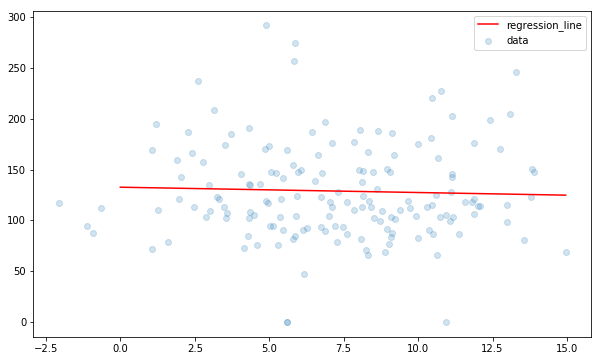

In [166]:
import numpy as np

x_values_to_plot = np.linspace(0, testing_dataframe["temperature"].max(), 100)
y_values_to_plot = (x_values_to_plot * model.coef_) + model.intercept_

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(testing_dataframe["temperature"], testing_dataframe["Item"], label="data", alpha=0.2)
ax.plot(x_values_to_plot, y_values_to_plot, label="regression_line", c="r")
ax.legend(loc="best")

plt.show()

C:\Users\yolan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


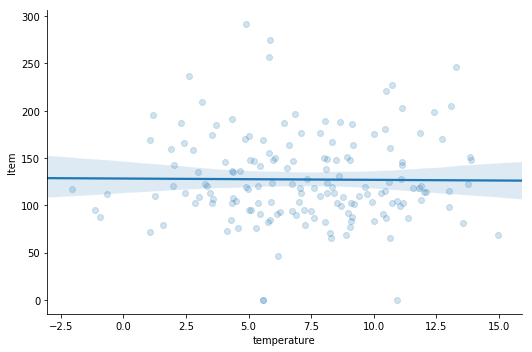

In [167]:
sns.lmplot(x='temperature', y='Item', data=testing_dataframe, aspect=1.5, scatter_kws={'alpha':0.2});

We can interpret this as that predicted value does not change whenever temperature changes.

In [168]:
y_pred = model.predict(X_train)
y_pred

array([131.22166613, 128.52589833, 131.16996408, 125.92211131,
       128.03623906, 127.96274449, 129.9804139 , 131.69073236,
       126.91470708, 132.09977097, 130.16399078, 126.90341866,
       133.80059365, 130.27405867, 133.20040426, 128.21306712,
       127.96993577, 128.4669506 , 129.67987623, 130.32504857,
       127.6260382 , 129.65239984, 130.87415052, 127.6664052 ,
       128.95463435, 128.80334193, 127.91467533, 128.50592495,
       127.32871339, 127.49065771, 129.0370495 , 127.10994256,
       128.19149759, 130.86354506, 128.47952392, 129.0027602 ,
       126.0543613 , 129.95355074, 127.26245298, 128.73467727,
       129.12310785, 128.07412666, 129.54371066, 125.92211131,
       126.39909618, 133.05993108, 129.65586685, 127.49065771,
       128.49809808, 127.15793574, 128.45624138, 126.55130224,
       126.89833949, 126.76948695, 128.04120711, 126.43120093,
       126.50415054, 132.16724975, 129.62729944, 129.90613274,
       127.94323113, 129.61156856, 127.00764501, 125.87

In [169]:
#errors, rmse, larger because of the outliners
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 38.26794347882268
MSE: 2403.682959468896
RMSE: 49.027369493670534


In [170]:
y_pred_mean = [y_train.mean()] * len(y_train)

print('RMSE (model):', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('RMSE: (baseline model):', np.sqrt(metrics.mean_squared_error(y_train, y_pred_mean)))

RMSE (model): 49.027369493670534
RMSE: (baseline model): 49.06109609356831


In [171]:
y_pred_mean = [y_test.mean()] * len(y_test)

print('RMSE (model):', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
print('RMSE: (baseline model):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mean)))


RMSE (model): 37.58165244292708
RMSE: (baseline model): 36.59813279595828


Score, as expected

In [172]:
print(model.score(X_test, y_test))

-0.05446916958582637


In [173]:
results = pd.DataFrame({'Actual': y_train.values, 'Predicted':  model.predict(X_train)})  

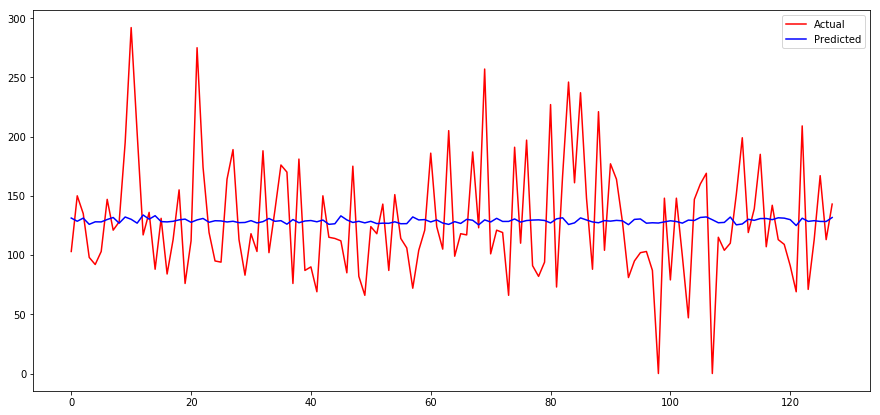

In [174]:
results[['Actual', 'Predicted']].plot(figsize=(15,7), style={'Actual': 'r', 'Predicted': 'b'})

In [175]:
resultsTest = pd.DataFrame({'Actual': y_test.values, 'Predicted':  model.predict(X_test)})  

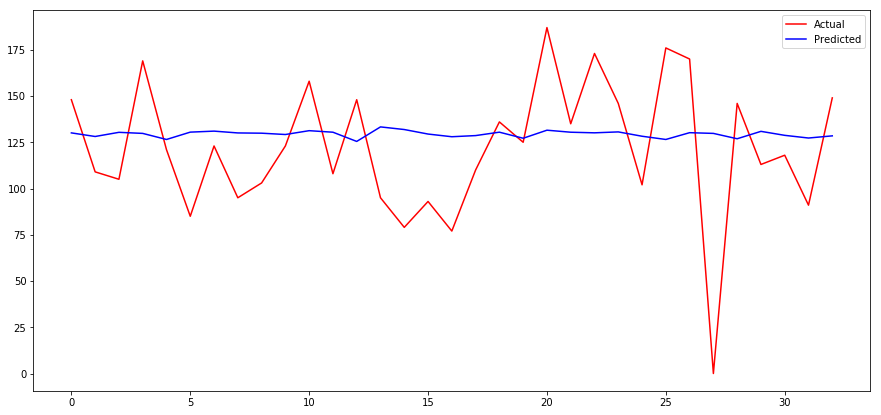

In [176]:
resultsTest[['Actual', 'Predicted']].plot(figsize=(15,7), style={'Actual': 'r', 'Predicted': 'b'})

C:\Users\yolan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


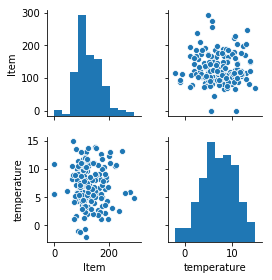

In [177]:
import seaborn as sns
sns.pairplot(testing_dataframe, size=2);

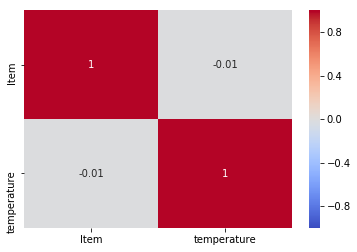

In [178]:


sns.heatmap(testing_dataframe.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm",
            annot=True);